# Spam Detection 

## Import the essential libraries 

In [25]:
%pip install wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import warnings
warnings.filterwarnings("ignore")

### Load the dataset 

In [27]:
df = pd.read_csv(r"https://raw.githubusercontent.com/laxmi-narayan-87/OIBSIP_DATA-SCIENCE/refs/heads/main/spam.csv", encoding='latin-1')

In [28]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Preprocessing 

In [29]:
df = df[['v1', 'v2']]  # Selecting only relevant columns
df.columns = ['label', 'text']  # Renaming columns for clarity

In [30]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [32]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [34]:
df.size

11144

In [35]:
df.shape

(5572, 2)

In [36]:
df.columns

Index(['label', 'text'], dtype='object')

In [37]:
df.ndim

2

In [38]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [39]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

# Data Cleaning 

In [40]:
df.duplicated().sum()

np.int64(403)

In [41]:
df.drop_duplicates(inplace = True)

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [44]:
df.isna().sum()

label    0
text     0
dtype: int64

In [45]:
# Convert labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [46]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Data Visualization 

## Visualization - WordCloud for Spam Emails 

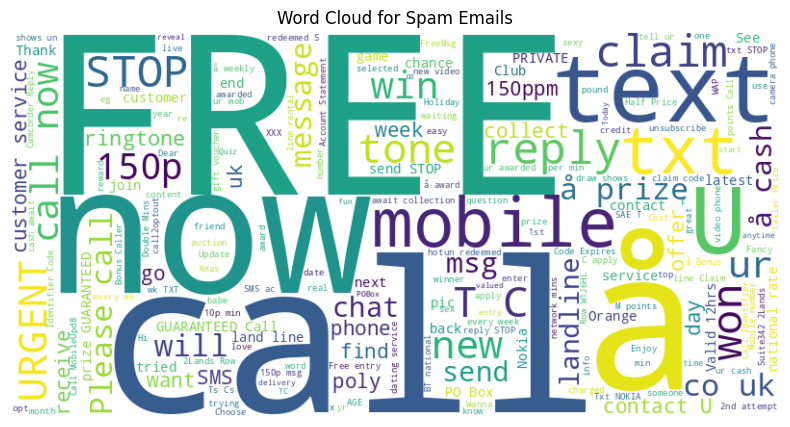

In [47]:
spam_text = ' '.join(df[df['label'] == 1 ]['text'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')
plt.show()

## Visualization - WordCloud for Non-Spam (Ham) Emails 

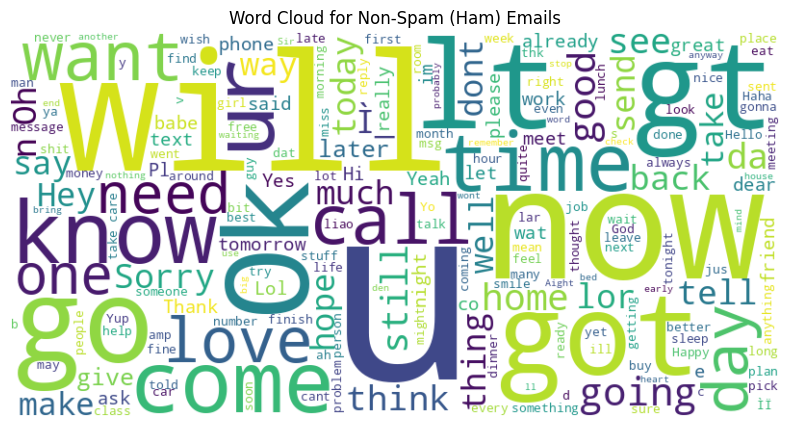

In [48]:
ham_text = ' '.join(df[df['label'] == 0 ]['text'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam (Ham) Emails')
plt.axis('off')
plt.show()

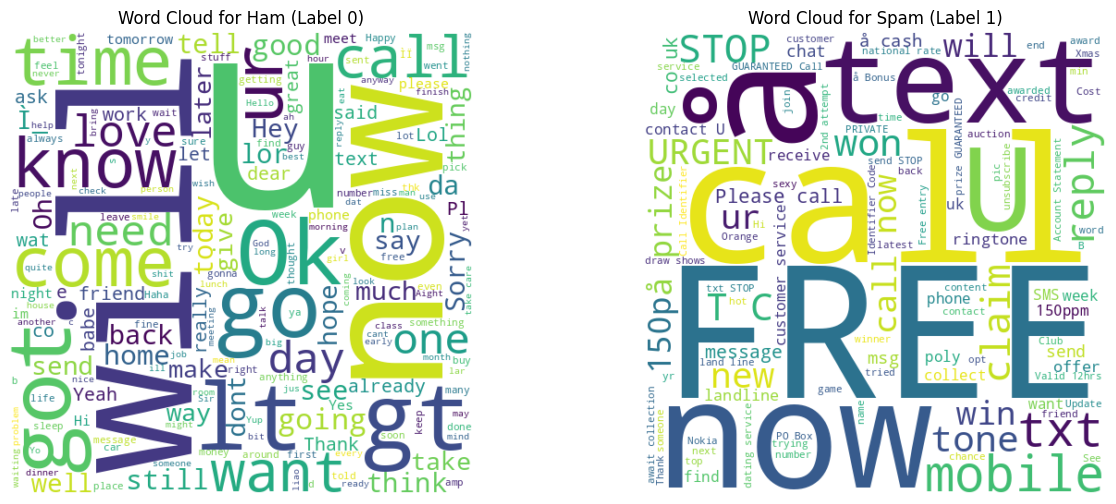

In [49]:
# Word cloud for 'ham' (label 0)
ham_text = ' '.join(df[df['label'] == 0]['text'])
ham_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(ham_text)

# Word cloud for 'spam' (label 1)
spam_text = ' '.join(df[df['label'] == 1]['text'])
spam_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(spam_text)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Word Cloud for Ham (Label 0)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Spam (Label 1)')
plt.axis('off')

plt.show()

## Bar Plot for Class Distribution

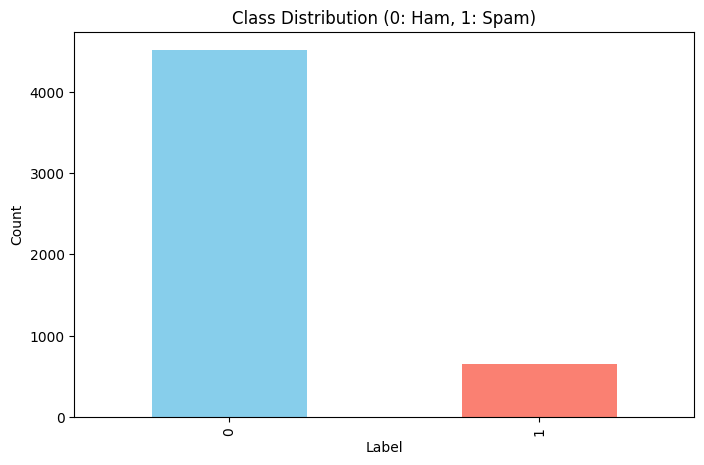

In [50]:
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (0: Ham, 1: Spam)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

##  Word Frequency Bar Plot

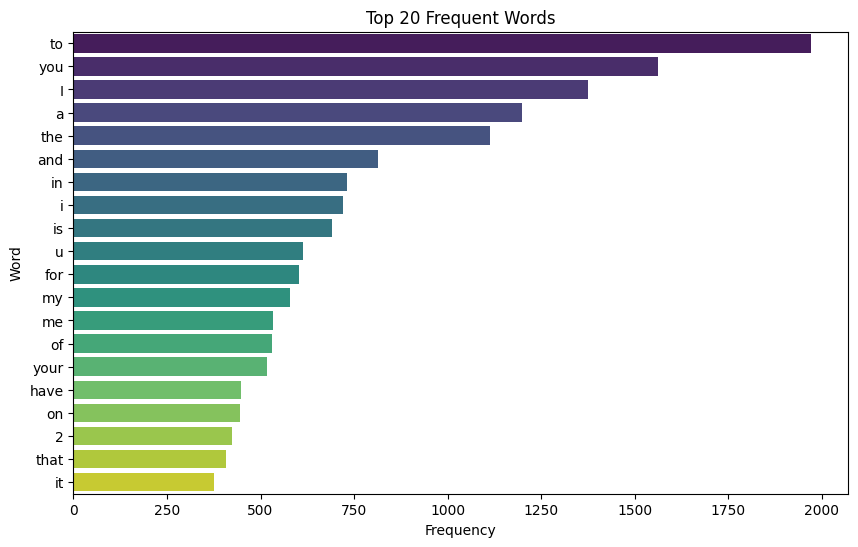

In [51]:
from collections import Counter

word_freq = Counter(' '.join(df['text']).split())

# Plotting the top 20 frequent words
top_words = word_freq.most_common(20)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')
plt.title('Top 20 Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

## Length Distribution of Messages 

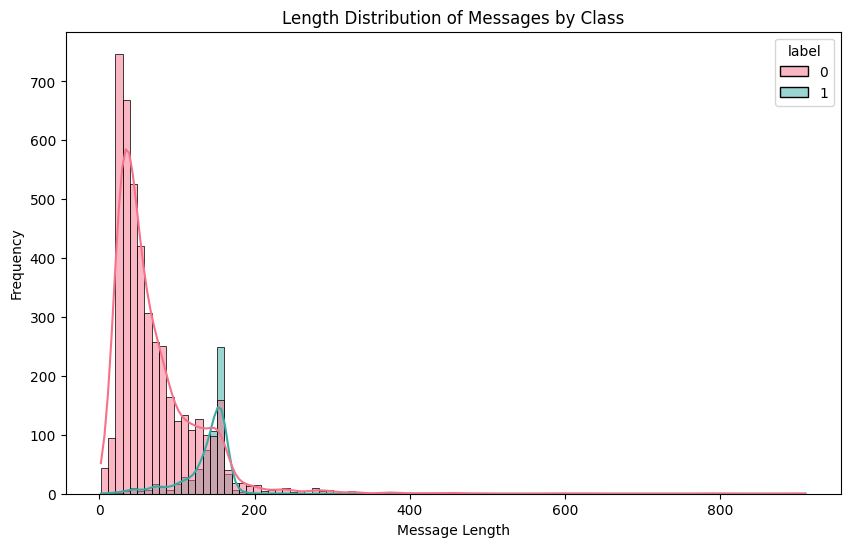

In [52]:
df['message_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(x='message_length', data=df, hue='label', kde=True, palette='husl')
plt.title('Length Distribution of Messages by Class')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

## Boxplot of Message Length by Class

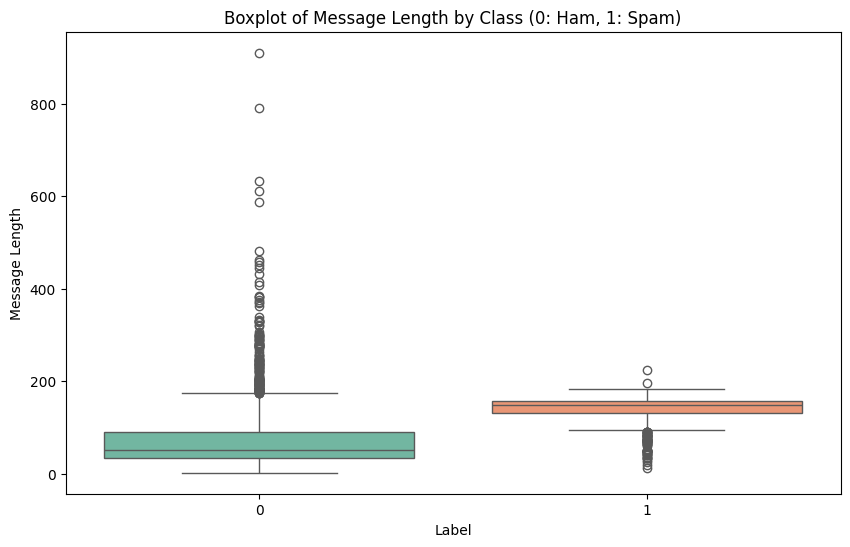

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='message_length', data=df, palette='Set2')
plt.title('Boxplot of Message Length by Class (0: Ham, 1: Spam)')
plt.xlabel('Label')
plt.ylabel('Message Length')
plt.show()

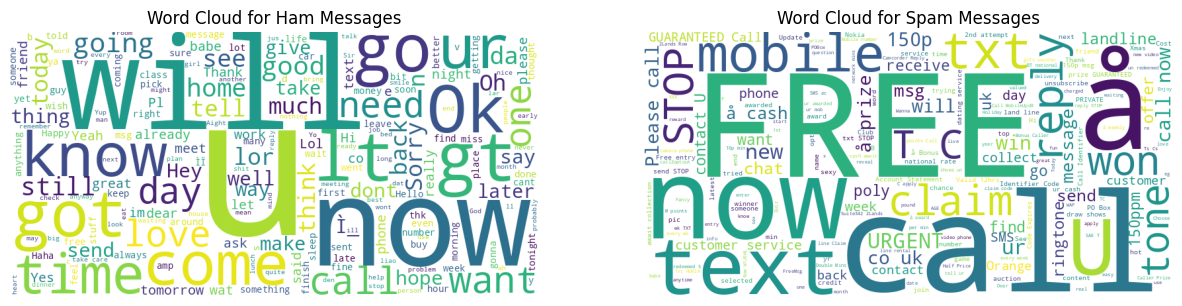

In [54]:
from wordcloud import STOPWORDS

ham_words = ' '.join(df[df['label'] == 0]['text'])
spam_words = ' '.join(df[df['label'] == 1]['text'])

ham_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(ham_words)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(spam_words)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud)
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud)
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.show()

## Email Length Distribution 

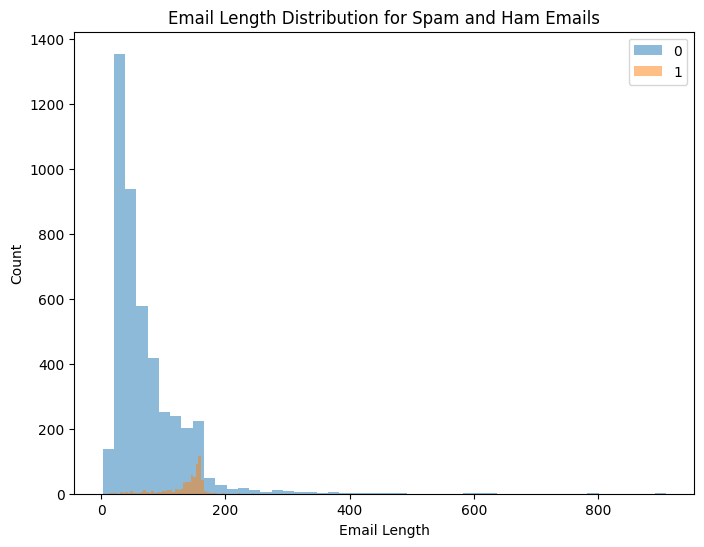

In [55]:
plt.figure(figsize=(8, 6))
df['text_length'] = df['text'].apply(len)
df.groupby('label')['text_length'].plot(kind='hist', alpha=0.5, legend=True, bins=50)
plt.title('Email Length Distribution for Spam and Ham Emails')
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.show()

In [56]:
df['message_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

## Pairplot for Message Length and Word Frequencies 

<Figure size 1200x800 with 0 Axes>

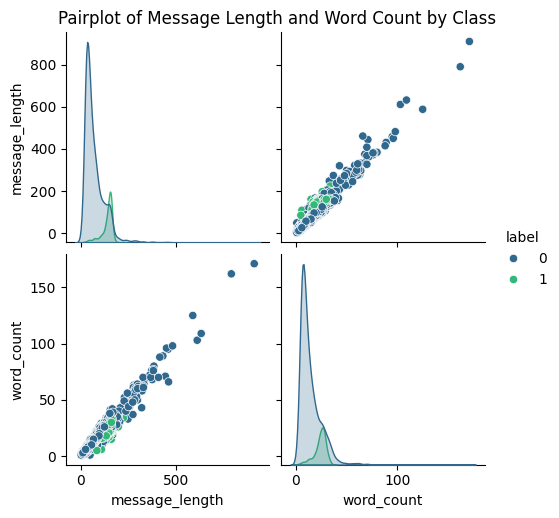

In [57]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='label', vars=['message_length', 'word_count'], palette='viridis')
plt.suptitle('Pairplot of Message Length and Word Count by Class', y=1.02)
plt.show()

## Heatmap of Correlation Matrix 

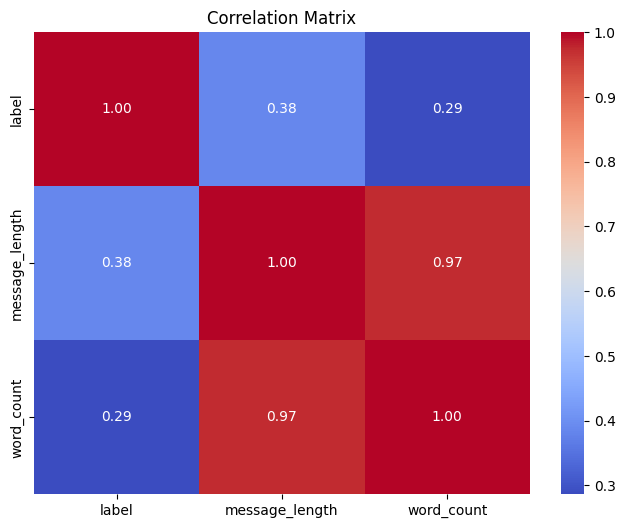

In [58]:
correlation_matrix = df[['label', 'message_length', 'word_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [59]:
df = df[['label', 'text']]

In [60]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Specifying x and y

In [61]:
x = df['text']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [62]:
y = df['label']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

# Split the dataset into training and testing sets 

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [65]:
# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

In [66]:
# Transform the test data
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Initialize the Multinomial Naive Bayes model

In [67]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

In [68]:
# Train the model
nb_model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [69]:
# Make predictions on the test set
y_pred = nb_model.predict(x_test_tfidf)

In [70]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

# Checking Model Performance 

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [72]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
accuracy_percentage = accuracy * 100
print(f'Accuracy in Percentage: {accuracy_percentage:.2f}%')

Accuracy: 0.9661508704061895
Accuracy in Percentage: 96.62%


In [73]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
precision_percentage = precision * 100
print(f'Precision in Percentage: {precision_percentage:.2f}%')

Precision: 0.9674330344059552
Precision in Percentage: 96.74%


In [74]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')
recall_percentage = recall * 100
print(f'Recall in Percentage: {recall_percentage:.2f}%')

Recall: 0.9661508704061895
Recall in Percentage: 96.62%


In [75]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')
f1score_percentage = f1 * 100
print(f'F1 Score in Percentage: {f1score_percentage:.2f}%')

F1 Score: 0.9641546199743948
F1 Score in Percentage: 96.42%


In [76]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[889,   0],
       [ 35, 110]])

In [77]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.76      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034



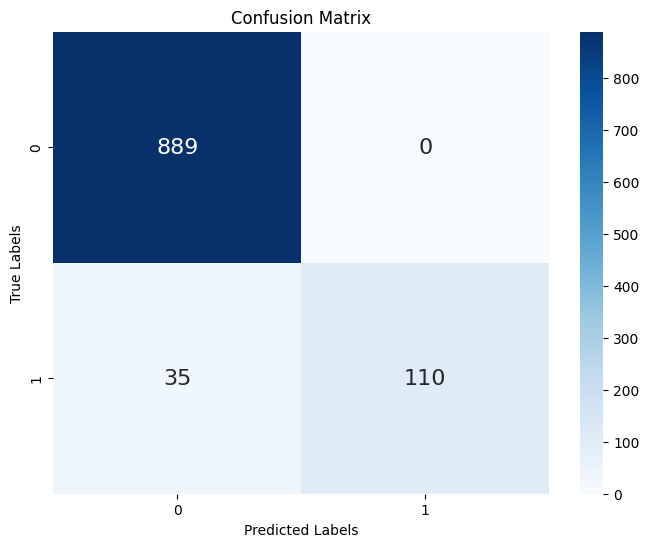

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

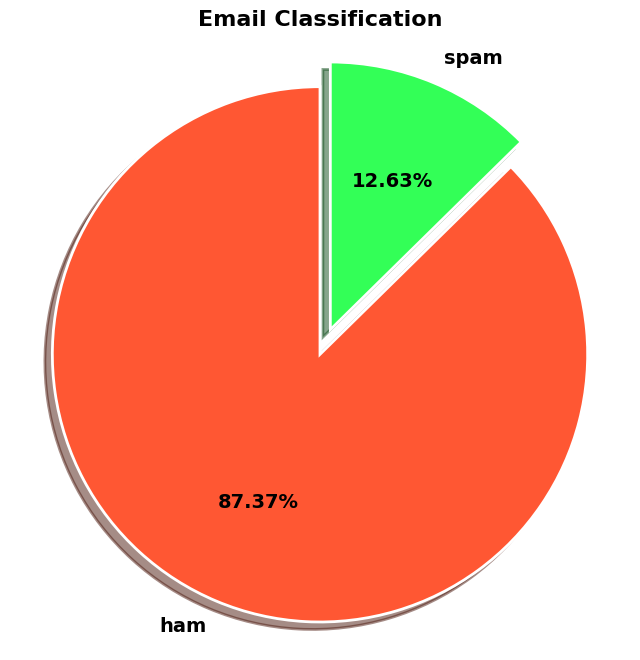

In [79]:
label_counts = df['label'].value_counts()

# Calculate percentages
total_emails = len(df)
ham_percentage = (label_counts[0] / total_emails) * 100
spam_percentage = (label_counts[1] / total_emails) * 100

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    [ham_percentage, spam_percentage],
    labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()


# Checking Model Predictions on New Data

In [80]:
new_email = ["URGENT: Congratulations! You've won ₹1,00,000! Claim your prize now by clicking the link below."]

# Transform the new email using the TF-IDF vectorizer
new_email_tfidf = tfidf_vectorizer.transform(new_email)

# Make prediction
new_email_prediction = nb_model.predict(new_email_tfidf)

# Display the prediction
if new_email_prediction[0] == 0:
    print('The new email is classified as HAM (not spam). It is safe to open.')
else:
    print('The new email is classified as SPAM. Please be cautious about this message.')

The new email is classified as SPAM. Please be cautious about this message.
